In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


# Importing Libraries

In [2]:
# importing necessary libraries
import tensorflow as tf
import tensorflow.keras as keras
import keras_tuner as kt

# Encoding 
from sklearn.preprocessing import LabelEncoder

# splitting the data 
from sklearn.model_selection import train_test_split

# valuating the features 
from sklearn.feature_selection import mutual_info_classif

# standardizatom
from sklearn.preprocessing import MinMaxScaler

# classification report
from sklearn.metrics import classification_report, confusion_matrix

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [3]:
# Importing trainset
train_df = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test_df = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")
train_df.name = "train set"
test_df.name = "test set"

# assigning the max columns and certain max rows to display so the veiw could be bigger to veiw and easy
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",50)

# Dataset Exploration

In [4]:
train_df.index = train_df['id']
train_df.drop(columns=['id'],inplace=True)
test_df.index = test_df['id']
test_df.drop(columns=['id'],inplace=True)
train_df.tail(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0
140699,Sai,Male,27.0,Patna,Student,NaN,4.0,NaN,9.24,1.0,NaN,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [5]:
test_df.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,,
140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  float

In [7]:
# Removing the name column from both the train and test set
train_df.drop(columns=['Name'],axis=1,inplace=True)
test_df.drop(columns=['Name'],axis=1,inplace=True)

# EDA

## Null Values

As you can see there are a lot of null values in the dataset for both train and test set, so lets figure out the reason for certain null values

In [8]:
train_df.isna().sum()

Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

columns like `Profession` , `Academic Pressure` , `Work Pressure` , `CGPA` , `Study Satisfaction` , `Job Satisfaction` , `Sleep Duration` , `Dietary Habits`,  `Degree`  , `Financial Stress` => columns have actually null values in it inside the train set however we will have to compare them with the test set to possibly avoid any differences in the number of rows in the test set.

In [9]:
test_df.isna().sum()

Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

* If there are no null values in the test set then we also ought not to keep the null valued rows inside the train set as well

In [10]:
train_df.shape

(140700, 18)

## Object Dtypes Catergorizing

In [11]:
# This functions primary role is to convert all the non-important categories in a series into 'other' category in the same series
# the inputs we will include in this function will be series , a string to rename category
# and this function will return the new series after categorizing the columns 


def unique_series_values( series ):    
    new_dict_ser= {}
    # if the below condition is true then only proceed else throw an error
    if isinstance(series, pd.Series) :

        # now we will check if the series is a object datatype or a number
        if series.dtype == 'O':
            # print("objects")
            new_series = series.copy()
            unique_ls = new_series.unique()
            for i in unique_ls:
                if i in new_series.values :
                    counts = new_series[new_series == i].count()
                    # print(f"item '{i}' occurences : {counts}")
                    new_dict_ser[i] = counts 
                else:
                    print("!waiting!")
            
        elif series.dtype==('float64' or 'int64'):
            print("numbers")

        return new_dict_ser
    else :
        print(f"The input element is either not a pd.Series OR a string")

def unwanted_series_names(dict_ser):
    # Now when you have the final dictionary we will now evaluate the items 
    # not based on the values but based on the percentage that we will be converting the values into percentage
    # and will only keep the desired percentages and rest of the minimal percentaged values are turned into 'others' category
    
    values_ls = np.array(list(dict_ser.values()))
    
    percen_ls = np.round((values_ls/np.sum(values_ls)*100),3)
    
    ser_percen_ls = {}
    for key , val in zip(dict_ser.keys(),percen_ls):
        # print(i,"->",train_df[train_df['City'] == i]['City'].count())
        ser_percen_ls[key] = val

    no_ls = []
    a=0
    for k , v in ser_percen_ls.items():
        # print(f"k = {k}, v= {v}")
        if v < 1:
            a+=v
            no_ls.append(k)
    return no_ls

def grouping_category(ls_unwanted , series, string):
    if isinstance(ls_unwanted, list) and isinstance(series, pd.Series) and isinstance(string,str):
        #print("proceed")
        for i, item in enumerate(series):
            if item in ls_unwanted:
                #print(i,True)
                series.replace(item, string,inplace=True)
        return series
    else:
        print("Not a valid list or series")
    # return pd.Series(categorized_series)



Index([
* 'Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [12]:
train_df[train_df.columns].select_dtypes(include=['object'])

,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
id,,,,,,,,,
0,Female,Ludhiana,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,No
1,Male,Varanasi,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,No
2,Male,Visakhapatnam,Student,NaN,5-6 hours,Healthy,B.Pharm,Yes,No
3,Male,Mumbai,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,Yes
4,Female,Kanpur,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,Yes
...,...,...,...,...,...,...,...,...,...
140695,Female,Ahmedabad,Working Professional,NaN,5-6 hours,Unhealthy,Class 12,No,Yes
140696,Female,Hyderabad,Working Professional,Content Writer,7-8 hours,Moderate,B.Tech,Yes,Yes
140697,Female,Kolkata,Working Professional,Marketing Manager,More than 8 hours,Moderate,B.Com,No,No


From the above we will initially deal with the `City` , `Profession` , `Sleep Duration`, `Dietary Habits` , `Degree` columns and then will proceed to the next step

## City Column Filtering

In [13]:
# city_ls = list(train_df["City"].unique())
# city_unique_ls = {}
# for i in city_ls:
#     # print(i,"->",train_df[train_df['City'] == i]['City'].count())
#     city_unique_ls[i] = train_df[train_df['City'] == i]['City'].count()

# values_ls = np.array(list(city_unique_ls.values()))

# percen_ls = np.round((values_ls/np.sum(values_ls)*100),3)

# city_percen_ls = {}
# for key , val in zip(city_ls,percen_ls):
#     # print(i,"->",train_df[train_df['City'] == i]['City'].count())
#     city_percen_ls[key] = val

# print(city_percen_ls)

# categorized_city_ls = {}
# a=0
# no_ls = []
# for k , v in city_percen_ls.items():
#     # print(f"k = {k}, v= {v}")
#     if v < 1:
#         a+=v
#         categorized_city_ls['others']=a
#         no_ls.append(k)
#     else :
#         categorized_city_ls[k] = v

# print(categorized_city_ls)
# print("--------------------------------------------")
# print(no_ls)

#### Train Set

In [14]:
# train set

unique_city_names_dict = unique_series_values(train_df['City'])
print(type(unique_city_names_dict))
print(unique_city_names_dict)
print("************************************************************")
unwanted_city_names = unwanted_series_names(unique_city_names_dict)
print(type(unwanted_city_names))
print(unwanted_city_names)
print("************************************************************")
new_city_col = grouping_category(unwanted_city_names , train_df['City'], "Others")
print(type(new_city_col))
print(new_city_col)
print("************************************************************")


<class 'dict'>
{'Ludhiana': 5226, 'Varanasi': 4606, 'Visakhapatnam': 5176, 'Mumbai': 4966, 'Kanpur': 4398, 'Ahmedabad': 5613, 'Thane': 4289, 'Nashik': 3144, 'Bangalore': 4123, 'Patna': 5924, 'Rajkot': 5207, 'Jaipur': 4328, 'Pune': 5210, 'Lucknow': 4280, 'Meerut': 5528, 'Agra': 4684, 'Surat': 4636, 'Faridabad': 3268, 'Hyderabad': 4496, 'Srinagar': 5074, 'Ghaziabad': 3620, 'Kolkata': 5689, 'Chennai': 4044, 'Kalyan': 6591, 'Nagpur': 4209, 'Vadodara': 4568, 'Vasai-Virar': 5765, 'Delhi': 3593, 'Bhopal': 3475, 'Indore': 4872, 'Ishanabad': 1, 'Vidhi': 1, 'Ayush': 2, 'Gurgaon': 1, 'Krishna': 1, 'Aishwarya': 1, 'Keshav': 2, 'Harsha': 3, 'Nalini': 2, 'Aditya': 1, 'Malyansh': 1, 'Raghavendra': 1, 'Saanvi': 3, 'M.Tech': 1, 'Bhavna': 3, 'Less Delhi': 1, 'Nandini': 4, 'M.Com': 2, 'Plata': 1, 'Atharv': 2, 'Pratyush': 3, 'City': 3, '3.0': 1, 'Less than 5 Kalyan': 1, 'MCA': 2, 'Mira': 1, 'Moreadhyay': 1, 'Morena': 1, 'Ishkarsh': 1, 'Kashk': 1, 'Mihir': 7, 'Vidya': 3, 'Tolkata': 1, 'Anvi': 1, 'Krinda': 

In [15]:
testing_city_train_col = unique_series_values(new_city_col)
print(testing_city_train_col)


{'Ludhiana': 5226, 'Varanasi': 4606, 'Visakhapatnam': 5176, 'Mumbai': 4966, 'Kanpur': 4398, 'Ahmedabad': 5613, 'Thane': 4289, 'Nashik': 3144, 'Bangalore': 4123, 'Patna': 5924, 'Rajkot': 5207, 'Jaipur': 4328, 'Pune': 5210, 'Lucknow': 4280, 'Meerut': 5528, 'Agra': 4684, 'Surat': 4636, 'Faridabad': 3268, 'Hyderabad': 4496, 'Srinagar': 5074, 'Ghaziabad': 3620, 'Kolkata': 5689, 'Chennai': 4044, 'Kalyan': 6591, 'Nagpur': 4209, 'Vadodara': 4568, 'Vasai-Virar': 5765, 'Delhi': 3593, 'Bhopal': 3475, 'Indore': 4872, 'Others': 98}


In [16]:
train_df['City'] = new_city_col

### Test Set

In [17]:
# train set

unique_city_names_dict_test_df = unique_series_values(test_df['City'])
print(type(unique_city_names_dict_test_df))
print(unique_city_names_dict_test_df)
print("************************************************************")
unwanted_city_names_test_df = unwanted_series_names(unique_city_names_dict_test_df)
print(type(unwanted_city_names_test_df))
print(unwanted_city_names_test_df)
print("************************************************************")
new_city_col_test_df = grouping_category(unwanted_city_names_test_df , test_df['City'], "Others")
print(type(new_city_col_test_df))
print(new_city_col_test_df)
print("************************************************************")


<class 'dict'>
{'Visakhapatnam': 3416, 'Kolkata': 3726, 'Jaipur': 2874, 'Rajkot': 3450, 'Kalyan': 4387, 'Mumbai': 3129, 'Surat': 3090, 'Srinagar': 3547, 'Delhi': 2536, 'Lucknow': 2860, 'Thane': 2835, 'Meerut': 3661, 'Nagpur': 2748, 'Ghaziabad': 2486, 'Chennai': 2674, 'Varanasi': 3052, 'Indore': 3040, 'Pune': 3318, 'Hyderabad': 3123, 'Kanpur': 2978, 'Nashik': 2182, 'Bhopal': 2370, 'Faridabad': 2196, 'Bangalore': 2707, 'Vasai-Virar': 3897, 'Ludhiana': 3545, 'Patna': 3888, 'Vadodara': 3169, 'Ahmedabad': 3677, 'Agra': 3189, 'Malyan': 1, 'Pratyush': 1, 'Vidya': 4, 'Less than 5 hours': 1, 'Aditi': 1, 'Keshav': 2, 'Nalini': 2, 'Mhopal': 1, 'Avni': 1, 'Ira': 1, 'Vaishnavi': 1, 'Bhavna': 3, 'Lawyer': 1, 'Thani': 1, 'Hrithik': 2, 'City': 2, 'Unaly': 1, 'Is Kanpur': 1, 'Golkata': 1, 'Less Delhi': 1, 'Sara': 1, 'Saurav': 1, 'Vikram': 2, 'Parth': 1, 'Siddhesh': 3, 'Vaikot': 1, 'Leela': 1, 'Chemist': 1, 'San Vasai-Virar': 1, 'No': 1, 'More Delhi': 1, 'Saanvi': 1, 'Pratham': 1, 'Vidhi': 1, 'Abhinav':

In [18]:
testing_city_test_col = unique_series_values(new_city_col_test_df)
print(testing_city_test_col)

{'Visakhapatnam': 3416, 'Kolkata': 3726, 'Jaipur': 2874, 'Rajkot': 3450, 'Kalyan': 4387, 'Mumbai': 3129, 'Surat': 3090, 'Srinagar': 3547, 'Delhi': 2536, 'Lucknow': 2860, 'Thane': 2835, 'Meerut': 3661, 'Nagpur': 2748, 'Ghaziabad': 2486, 'Chennai': 2674, 'Varanasi': 3052, 'Indore': 3040, 'Pune': 3318, 'Hyderabad': 3123, 'Kanpur': 2978, 'Nashik': 2182, 'Bhopal': 2370, 'Faridabad': 2196, 'Bangalore': 2707, 'Vasai-Virar': 3897, 'Ludhiana': 3545, 'Patna': 3888, 'Vadodara': 3169, 'Ahmedabad': 3677, 'Agra': 3189, 'Others': 50}


In [19]:
test_df['City'] = new_city_col_test_df

In [20]:
test_df['City'].unique()

array(['Visakhapatnam', 'Kolkata', 'Jaipur', 'Rajkot', 'Kalyan', 'Mumbai',
       'Surat', 'Srinagar', 'Delhi', 'Lucknow', 'Thane', 'Meerut',
       'Nagpur', 'Ghaziabad', 'Chennai', 'Varanasi', 'Indore', 'Pune',
       'Hyderabad', 'Kanpur', 'Nashik', 'Bhopal', 'Faridabad',
       'Bangalore', 'Vasai-Virar', 'Ludhiana', 'Patna', 'Vadodara',
       'Ahmedabad', 'Agra', 'Others'], dtype=object)

## Profession Column Filtering

### Train Set

In [21]:
train_df['Profession'].isna().sum()

36630

In [22]:
train_df[(train_df['Working Professional or Student'] == 'Student')]['Profession'].count()

34

In [23]:
train_df.loc[train_df['Working Professional or Student'] == 'Student', 'Profession'] = train_df.loc[train_df['Working Professional or Student'] == 'Student', 'Profession'].fillna("Student")


In [24]:
train_df['Profession'].isna().sum()

8763

In [25]:
train_df.loc[train_df['Work Pressure'].isna(), 'Profession'] = train_df.loc[train_df['Work Pressure'].isna(), 'Profession'].fillna("Student")


In [26]:
train_df['Profession'].isna().sum()

8745

In [27]:
train_df.loc[train_df['Job Satisfaction'].isna(), 'Profession'] = train_df.loc[train_df['Job Satisfaction'].isna(), 'Profession'].fillna("Student")


In [28]:
train_df['Profession'].isna().sum()

8740

In [29]:
# assigning the profession column 
train_set_profession = unique_series_values(train_df['Profession'])

# valuating the unwanted columns
unwanted_profession_ls = unwanted_series_names(train_set_profession)

# categorizing the column with the other category
new_profession_col = grouping_category(unwanted_profession_ls , train_df['Profession'], "Others")
print(type(new_profession_col))
print(new_profession_col)

!waiting!
<class 'pandas.core.series.Series'>
id
0                      Chef
1                   Teacher
2                   Student
3                   Teacher
4          Business Analyst
                ...        
140695                  NaN
140696       Content Writer
140697    Marketing Manager
140698              Plumber
140699              Student
Name: Profession, Length: 140700, dtype: object


In [30]:
new_profession_col.nunique()

33

In [31]:
train_df['Profession'] =  new_profession_col

In [32]:
train_df['Profession'].isna().sum()

8740

In [33]:
train_df[train_df['Profession'].isna()]['Degree'].unique()

array(['Class 12', 'MA', 'MSc', 'MBA', 'B.Arch', 'MCA', 'B.Com', 'BSc',
       'M.Pharm', 'MD', 'B.Ed', 'Degree', 'BE', 'BCA', 'BHM', 'ME', 'LLM',
       'LLB', 'M.Com', 'B.Tech', 'MHM', 'LLBA', 'M.Tech', 'BBA', 'BA',
       '5.56', 'MBBS', 'M.Ed', 'B.Pharm', '5.88', 'Navya', nan, 'M',
       'PhD'], dtype=object)

We can only assume that the rest of the null values indicate `unemployment`

In [34]:
train_df['Profession'] = train_df['Profession'].fillna('Unemployed')

In [35]:
train_df['Profession'].isna().sum()

0

In [36]:
train_df['Profession'].nunique()

34

### Test Set

In [37]:
test_df['Profession'].isna().sum()

24632

In [38]:
test_df[(test_df['Working Professional or Student'] == 'Student')]['Profession'].count()

26

In [39]:
test_df.loc[test_df['Working Professional or Student'] == 'Student', 'Profession'] = test_df.loc[test_df['Working Professional or Student'] == 'Student', 'Profession'].fillna("Student")


In [40]:
train_df['Profession'].isna().sum()

0

In [41]:
train_df['Profession'].isna().sum()

0

In [42]:
# assigning the profession column 
test_set_profession_test = unique_series_values(test_df['Profession'])

# valuating the unwanted columns
unwanted_test_profession_ls = unwanted_series_names(test_set_profession_test)

# categorizing the column with the other category
new_profession_col_test = grouping_category(unwanted_test_profession_ls , test_df['Profession'], "Others")
print(type(new_profession_col_test))
print(new_profession_col_test)

!waiting!
<class 'pandas.core.series.Series'>
id
140700                     Judge
140701    Educational Consultant
140702                   Teacher
140703                   Student
140704                   Teacher
                   ...          
234495                     Pilot
234496                     Pilot
234497                   Student
234498         Marketing Manager
234499    Educational Consultant
Name: Profession, Length: 93800, dtype: object


In [43]:
new_profession_col_test.nunique()

32

In [44]:
test_df['Profession'] =  new_profession_col_test

In [45]:
test_df['Profession'].isna().sum()

5886

In [46]:
test_df['Profession'] = test_df['Profession'].fillna('Unemployed')

In [47]:
test_df['Profession'].isna().sum()

0

In [48]:
test_df['Profession'].unique()

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', 'Unemployed', 'Chemist', 'Content Writer',
       'Consultant', 'HR Manager', 'Others', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Entrepreneur', 'Manager',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Researcher', 'Civil Engineer'], dtype=object)

## Sleep Duration Column Filtering

### Train Set

In [49]:
train_df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [50]:
train_df['Sleep Duration'].isna().sum()

0

In [51]:
train_sleepD_list = unique_series_values(train_df["Sleep Duration"])
train_sleepD_N_ls = unwanted_series_names(train_sleepD_list)
new_sleepD_train_ls = grouping_category(train_sleepD_N_ls, train_df['Sleep Duration'], "Others")

In [52]:
new_sleepD_train_ls.unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Others'], dtype=object)

In [53]:
train_df["Sleep Duration"] = new_sleepD_train_ls

In [54]:
train_df["Sleep Duration"].isna().sum()

0

### Test Set

In [55]:
test_df['Sleep Duration'].unique()

array(['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours',
       '0', 'Meerut', '9-5 hours', '6-7 hours', '60-65 hours', 'Vivan',
       '3-4 hours', '1-6 hours', '9-5', 'Unhealthy', '8-9 hours',
       '4-5 hours', 'than 5 hours', '9-6 hours', '1-2 hours',
       '8-89 hours', 'Have_you_ever_had_suicidal_thoughts', '20-21 hours',
       '10-6 hours', '1-3 hours', '6 hours', '50-75 hours', '4-6 hours',
       '2-3 hours', '9-11 hours', '9-10 hours', '3-6 hours'], dtype=object)

In [56]:
test_df['Sleep Duration'].isna().sum()

0

In [57]:
test_sleepD_list = unique_series_values(test_df["Sleep Duration"])
test_sleepD_N_ls = unwanted_series_names(test_sleepD_list)
new_sleepD_test_ls = grouping_category(test_sleepD_N_ls, test_df['Sleep Duration'], "Others")

In [58]:
new_sleepD_test_ls.unique()

array(['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours',
       'Others'], dtype=object)

In [59]:
test_df["Sleep Duration"] = new_sleepD_test_ls

In [60]:
test_df["Sleep Duration"].isna().sum()

0

## Dietary Habits Column

### Train Set

In [61]:
train_df["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [62]:
train_df["Dietary Habits"] = train_df["Dietary Habits"].fillna("null")

In [63]:
train_df["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', 'null', 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [64]:
train_df['Dietary Habits'].isna().sum()

0

In [65]:
diet_train_ls = unique_series_values(train_df["Dietary Habits"])
unwanted_diet_ls = unwanted_series_names(diet_train_ls)
new_train_diet_H = grouping_category(unwanted_diet_ls,train_df["Dietary Habits"], "Others" )

In [66]:
train_df['Dietary Habits'].isna().sum()

0

In [67]:
train_df["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Others'], dtype=object)

### Test Set

In [68]:
test_df["Dietary Habits"].unique()

array(['Moderate', 'Healthy', 'Unhealthy', 'More Healthy', 'No', 'Indoor',
       'Prachi', nan, 'Male', 'Less Healthy', 'Mealy', 'Resistant', 'MCA',
       '5 Healthy', 'Academic', 'Educational', 'Soham', '5 Unhealthy',
       'Vivaan', 'Raghav', '1.0', 'Naina', 'Kolkata'], dtype=object)

In [69]:
test_df["Dietary Habits"] = test_df["Dietary Habits"].fillna("null")

In [70]:
test_df["Dietary Habits"].unique()

array(['Moderate', 'Healthy', 'Unhealthy', 'More Healthy', 'No', 'Indoor',
       'Prachi', 'null', 'Male', 'Less Healthy', 'Mealy', 'Resistant',
       'MCA', '5 Healthy', 'Academic', 'Educational', 'Soham',
       '5 Unhealthy', 'Vivaan', 'Raghav', '1.0', 'Naina', 'Kolkata'],
      dtype=object)

In [71]:
test_df['Dietary Habits'].isna().sum()

0

In [72]:
diet_test_ls = unique_series_values(test_df["Dietary Habits"])
unwanted_diet_ls_test = unwanted_series_names(diet_test_ls)
new_test_diet_H = grouping_category(unwanted_diet_ls_test, test_df["Dietary Habits"], "Others" )

In [73]:
test_df['Dietary Habits'].isna().sum()

0

In [74]:
train_df["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Others'], dtype=object)

## Degree Column FIltering

### Train Set

In [75]:
train_df["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [76]:
train_df["Degree"] = train_df["Degree"].fillna("null")

In [77]:
train_df["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [78]:
train_df['Degree'].isna().sum()

0

In [79]:
degree_train_ls = unique_series_values(train_df["Degree"])
unwanted_degree_ls = unwanted_series_names(degree_train_ls)
new_train_degree = grouping_category( unwanted_degree_ls , train_df["Degree"], "Others" )

In [80]:
train_df['Degree'].isna().sum()

0

In [81]:
train_df["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'Others'], dtype=object)

### Test Set

In [82]:
test_df["Degree"].unique()

array(['LLB', 'B.Ed', 'B.Arch', 'BSc', 'BCA', 'B.Com', 'MA', 'BA', 'BBA',
       'Class 12', 'MD', 'MBA', 'M.Ed', 'M.Pharm', 'BHM', 'LLM', 'PhD',
       'M.Com', 'BE', 'MBBS', 'B.Tech', 'ME', 'MCA', 'B.Pharm', 'MHM',
       'M.Tech', 'BTech', 'MSc', 'BArch', 'B. Gender', 'B.Study_Hours',
       'Advait', 'M.Arch', 'A.Ed', 'Mechanical Engineer', 'B.H', 'B.Sc',
       'B', 'M.UI', 'Vibha', 'B BCA', 'B.Press', 'BPharm', 'Gagan',
       'MPharm', 'Travel Consultant', '5.65', 'Business Analyst',
       'Eshita', 'B_Com', 'Navya', 'B._Pharm', 'Pune', 'Bian', 'B.M.Com',
       'Kavya', 'M.M.Ed', 'S.Pharm', 'Vrinda', 'M', 'E.Ed', '3.0',
       'Moham', 'B.BA', nan, 'I.Ed', 'Degree', 'Magan', 'B B.Tech',
       'M.B.Ed', 'Bhopal', 'B Financial Analyst', 'GCA', 'G.Ed', 'Rupak',
       'RCA', 'B.CA', 'PCA', 'J.Ed', 'BH', 'BEd', '8.95', 'Aadhya', '20',
       'Banchal', 'M.', 'K.Ed', 'BHCA'], dtype=object)

In [83]:
test_df["Degree"] = test_df["Degree"].fillna("null")

In [84]:
test_df["Degree"].unique()

array(['LLB', 'B.Ed', 'B.Arch', 'BSc', 'BCA', 'B.Com', 'MA', 'BA', 'BBA',
       'Class 12', 'MD', 'MBA', 'M.Ed', 'M.Pharm', 'BHM', 'LLM', 'PhD',
       'M.Com', 'BE', 'MBBS', 'B.Tech', 'ME', 'MCA', 'B.Pharm', 'MHM',
       'M.Tech', 'BTech', 'MSc', 'BArch', 'B. Gender', 'B.Study_Hours',
       'Advait', 'M.Arch', 'A.Ed', 'Mechanical Engineer', 'B.H', 'B.Sc',
       'B', 'M.UI', 'Vibha', 'B BCA', 'B.Press', 'BPharm', 'Gagan',
       'MPharm', 'Travel Consultant', '5.65', 'Business Analyst',
       'Eshita', 'B_Com', 'Navya', 'B._Pharm', 'Pune', 'Bian', 'B.M.Com',
       'Kavya', 'M.M.Ed', 'S.Pharm', 'Vrinda', 'M', 'E.Ed', '3.0',
       'Moham', 'B.BA', 'null', 'I.Ed', 'Degree', 'Magan', 'B B.Tech',
       'M.B.Ed', 'Bhopal', 'B Financial Analyst', 'GCA', 'G.Ed', 'Rupak',
       'RCA', 'B.CA', 'PCA', 'J.Ed', 'BH', 'BEd', '8.95', 'Aadhya', '20',
       'Banchal', 'M.', 'K.Ed', 'BHCA'], dtype=object)

In [85]:
test_df['Degree'].isna().sum()

0

In [86]:
degree_test_ls = unique_series_values(test_df["Degree"])
unwanted_degree_ls_test = unwanted_series_names(degree_test_ls)
new_test_degree = grouping_category(unwanted_degree_ls_test, test_df["Degree"], "Others" )

In [87]:
test_df['Degree'].isna().sum()

0

In [88]:
test_df["Degree"].unique()

array(['LLB', 'B.Ed', 'B.Arch', 'BSc', 'BCA', 'B.Com', 'MA', 'BA', 'BBA',
       'Class 12', 'MD', 'MBA', 'M.Ed', 'M.Pharm', 'BHM', 'LLM', 'PhD',
       'M.Com', 'BE', 'MBBS', 'B.Tech', 'ME', 'MCA', 'B.Pharm', 'MHM',
       'M.Tech', 'Others', 'MSc'], dtype=object)

Now that our `OBJECT` data in the train and test set have been cleaned and ordered and it is ready for the categorization 

## Train & Test set object sorted

In [89]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-null  object 
 3   Working Professional or Student        140700 non-null  object 
 4   Profession                             140700 non-null  object 
 5   Academic Pressure                      27897 non-null   float64
 6   Work Pressure                          112782 non-null  float64
 7   CGPA                                   27898 non-null   float64
 8   Study Satisfaction                     27897 non-null   float64
 9   Job Satisfaction                       112790 non-null  float64
 10  Sleep Duration                         140700 non-null  objec

In [90]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93800 entries, 140700 to 234499
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 93800 non-null  object 
 1   Age                                    93800 non-null  float64
 2   City                                   93800 non-null  object 
 3   Working Professional or Student        93800 non-null  object 
 4   Profession                             93800 non-null  object 
 5   Academic Pressure                      18767 non-null  float64
 6   Work Pressure                          75022 non-null  float64
 7   CGPA                                   18766 non-null  float64
 8   Study Satisfaction                     18767 non-null  float64
 9   Job Satisfaction                       75026 non-null  float64
 10  Sleep Duration                         93800 non-null  object 
 11  D

## Dealing with numerical datatype

In [91]:
train_num_df = train_df.select_dtypes(include=['number'])
train_num_df.drop(columns=['Depression'],inplace=True)
print(train_num_df)
test_num_df = test_df.select_dtypes(include=['number'])
print(test_num_df)

         Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
id                                                                         
0       49.0                NaN            5.0   NaN                 NaN   
1       26.0                NaN            4.0   NaN                 NaN   
2       33.0                5.0            NaN  8.97                 2.0   
3       22.0                NaN            5.0   NaN                 NaN   
4       30.0                NaN            1.0   NaN                 NaN   
...      ...                ...            ...   ...                 ...   
140695  18.0                NaN            5.0   NaN                 NaN   
140696  41.0                NaN            5.0   NaN                 NaN   
140697  24.0                NaN            3.0   NaN                 NaN   
140698  49.0                NaN            5.0   NaN                 NaN   
140699  27.0                4.0            NaN  9.24                 1.0   

        Job

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

In [92]:
print(train_num_df.isna().sum())
print()
print(test_num_df.isna().sum())

Age                        0
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Work/Study Hours           0
Financial Stress           4
dtype: int64

Age                       0
Academic Pressure     75033
Work Pressure         18778
CGPA                  75034
Study Satisfaction    75033
Job Satisfaction      18774
Work/Study Hours          0
Financial Stress          0
dtype: int64


In [93]:
# train set loop 
for i in train_num_df.columns:
    print(f"{i} columns has {train_num_df[i].unique()} items")
    print()

print('#'*100)

# test set loop 
for i in test_num_df.columns:
    print(f"{i} columns has {test_num_df[i].unique()} items")
    print()

Age columns has [49. 26. 33. 22. 30. 59. 47. 38. 24. 42. 55. 51. 39. 29. 50. 23. 56. 45.
 37. 46. 31. 19. 28. 25. 41. 60. 18. 36. 21. 58. 44. 43. 40. 35. 54. 27.
 52. 48. 57. 53. 34. 20. 32.] items

Academic Pressure columns has [nan  5.  2.  3.  4.  1.] items

Work Pressure columns has [ 5.  4. nan  1.  2.  3.] items

CGPA columns has [    nan  8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04
  9.79    8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25
  7.83    9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74
  9.86    6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99
  5.24    9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71
  7.87    5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09
  9.82    8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64
  5.27    6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88
  5.32    6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79
  9.95    5.37    6.86 

In this we can understand that if we could change the null values into `0` then the data would make some sense

In [94]:
train_num_df = train_num_df.fillna(0)
test_num_df = test_num_df.fillna(0)

In [95]:
print(train_num_df.info())
print(test_num_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 140700 non-null  float64
 1   Academic Pressure   140700 non-null  float64
 2   Work Pressure       140700 non-null  float64
 3   CGPA                140700 non-null  float64
 4   Study Satisfaction  140700 non-null  float64
 5   Job Satisfaction    140700 non-null  float64
 6   Work/Study Hours    140700 non-null  float64
 7   Financial Stress    140700 non-null  float64
dtypes: float64(8)
memory usage: 9.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 93800 entries, 140700 to 234499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 93800 non-null  float64
 1   Academic Pressure   93800 non-null  float64
 2   Work Pressure       93800 non-null  floa

In [96]:
train_df[['Age','Academic Pressure', 'Work Pressure', 'CGPA', 
        'Study Satisfaction','Job Satisfaction', 
          'Work/Study Hours', 'Financial Stress']] = train_num_df[['Age','Academic Pressure', 
                                                                  'Work Pressure', 'CGPA', 
                                                                  'Study Satisfaction','Job Satisfaction', 'Work/Study Hours', 
                                                                  'Financial Stress']]

train_df.tail(5)

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,
140695,Female,18.0,Ahmedabad,Working Professional,Unemployed,0.0,5.0,0.00,0.0,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Female,41.0,Hyderabad,Working Professional,Content Writer,0.0,5.0,0.00,0.0,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Female,24.0,Kolkata,Working Professional,Marketing Manager,0.0,3.0,0.00,0.0,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,Female,49.0,Srinagar,Working Professional,Plumber,0.0,5.0,0.00,0.0,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0
140699,Male,27.0,Patna,Student,Student,4.0,0.0,9.24,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [97]:
test_df[['Age','Academic Pressure', 'Work Pressure', 'CGPA', 
        'Study Satisfaction','Job Satisfaction', 
          'Work/Study Hours', 'Financial Stress']] = test_num_df[['Age','Academic Pressure', 
                                                                  'Work Pressure', 'CGPA', 
                                                                  'Study Satisfaction','Job Satisfaction', 'Work/Study Hours', 
                                                                  'Financial Stress']]

test_df.head(5)

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,
140700,Male,53.0,Visakhapatnam,Working Professional,Judge,0.0,2.0,0.00,0.0,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
140701,Female,58.0,Kolkata,Working Professional,Educational Consultant,0.0,2.0,0.00,0.0,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
140702,Male,53.0,Jaipur,Working Professional,Teacher,0.0,4.0,0.00,0.0,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
140703,Female,23.0,Rajkot,Student,Student,5.0,0.0,6.84,1.0,0.0,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
140704,Male,47.0,Kalyan,Working Professional,Teacher,0.0,5.0,0.00,0.0,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [98]:
train_df.to_csv("Cleaned_train_set.csv")
test_df.to_csv("Cleaned_test_set.csv")

## Categorizing Object to numericals (Label Encoding)

In [99]:
train_obj_df = train_df.select_dtypes(include=['object'])
train_obj_df
test_obj_df = test_df.select_dtypes(include=['object'])
test_obj_df

,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
id,,,,,,,,,
140700,Male,Visakhapatnam,Working Professional,Judge,Less than 5 hours,Moderate,LLB,No,Yes
140701,Female,Kolkata,Working Professional,Educational Consultant,Less than 5 hours,Moderate,B.Ed,No,No
140702,Male,Jaipur,Working Professional,Teacher,7-8 hours,Moderate,B.Arch,Yes,No
140703,Female,Rajkot,Student,Student,More than 8 hours,Moderate,BSc,Yes,No
140704,Male,Kalyan,Working Professional,Teacher,7-8 hours,Moderate,BCA,Yes,No
...,...,...,...,...,...,...,...,...,...
234495,Female,Jaipur,Working Professional,Pilot,Less than 5 hours,Moderate,BSc,Yes,Yes
234496,Male,Ahmedabad,Working Professional,Pilot,7-8 hours,Moderate,BE,Yes,Yes
234497,Male,Visakhapatnam,Student,Student,7-8 hours,Moderate,B.Tech,No,No


In [100]:
# Label Encoding train set
train_obj_df = train_obj_df.apply(LabelEncoder().fit_transform)
train_obj_df

,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
id,,,,,,,,,
0,0,15,1,3,3,0,9,0,0
1,1,28,1,30,2,3,12,1,0
2,1,30,0,29,0,0,3,1,0
3,1,17,1,30,2,1,6,1,1
4,0,12,1,2,0,3,6,1,1
...,...,...,...,...,...,...,...,...,...
140695,0,1,1,33,0,3,11,0,1
140696,0,8,1,7,1,1,4,1,1
140697,0,13,1,21,3,1,1,0,0


In [101]:
# Label Encoding train set
test_obj_df = test_obj_df.apply(LabelEncoder().fit_transform)
test_obj_df

,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
id,,,,,,,,,
140700,1,30,1,17,2,1,12,0,1
140701,0,13,1,11,2,1,2,0,0
140702,1,10,1,29,1,1,0,1,0
140703,0,23,0,28,3,1,10,1,0
140704,1,11,1,29,1,1,7,1,0
...,...,...,...,...,...,...,...,...,...
234495,0,10,1,23,2,1,10,1,1
234496,1,1,1,23,1,1,8,1,1
234497,1,30,0,28,1,1,4,0,0


In [102]:
col_obj_ls = list(train_obj_df.columns)
col_obj_ls

['Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [103]:
train_df[col_obj_ls] = train_obj_df[col_obj_ls]
train_df

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,
0,0,49.0,15,1,3,0.0,5.0,0.00,0.0,2.0,3,0,9,0,1.0,2.0,0,0
1,1,26.0,28,1,30,0.0,4.0,0.00,0.0,3.0,2,3,12,1,7.0,3.0,0,1
2,1,33.0,30,0,29,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
3,1,22.0,17,1,30,0.0,5.0,0.00,0.0,1.0,2,1,6,1,10.0,1.0,1,1
4,0,30.0,12,1,2,0.0,1.0,0.00,0.0,1.0,0,3,6,1,9.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0,18.0,1,1,33,0.0,5.0,0.00,0.0,4.0,0,3,11,0,2.0,4.0,1,1
140696,0,41.0,8,1,7,0.0,5.0,0.00,0.0,4.0,1,1,4,1,6.0,5.0,1,0
140697,0,24.0,13,1,21,0.0,3.0,0.00,0.0,1.0,3,1,1,0,4.0,4.0,0,0


In [104]:
test_df[col_obj_ls] = test_obj_df[col_obj_ls]
test_df

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,
140700,1,53.0,30,1,17,0.0,2.0,0.00,0.0,5.0,2,1,12,0,9.0,3.0,1
140701,0,58.0,13,1,11,0.0,2.0,0.00,0.0,4.0,2,1,2,0,6.0,4.0,0
140702,1,53.0,10,1,29,0.0,4.0,0.00,0.0,1.0,1,1,0,1,12.0,4.0,0
140703,0,23.0,23,0,28,5.0,0.0,6.84,1.0,0.0,3,1,10,1,10.0,4.0,0
140704,1,47.0,11,1,29,0.0,5.0,0.00,0.0,5.0,1,1,7,1,3.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,0,49.0,10,1,23,0.0,3.0,0.00,0.0,5.0,2,1,10,1,2.0,2.0,1
234496,1,29.0,1,1,23,0.0,5.0,0.00,0.0,1.0,1,1,8,1,11.0,3.0,1
234497,1,24.0,30,0,28,1.0,0.0,7.51,4.0,0.0,1,1,4,0,7.0,1.0,0


In [105]:
# deletting duplicate rows for the trainset
print(f"Duplicates for Train Set : {train_df.duplicated().sum()}")
print(f"Duplicates for Test Set : {test_df.duplicated().sum()}")


Duplicates for Train Set : 5
Duplicates for Test Set : 4


In [106]:
train_df.tail(5)

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,
140695,0,18.0,1,1,33,0.0,5.0,0.00,0.0,4.0,0,3,11,0,2.0,4.0,1,1
140696,0,41.0,8,1,7,0.0,5.0,0.00,0.0,4.0,1,1,4,1,6.0,5.0,1,0
140697,0,24.0,13,1,21,0.0,3.0,0.00,0.0,1.0,3,1,1,0,4.0,4.0,0,0
140698,0,49.0,24,1,25,0.0,5.0,0.00,0.0,2.0,0,1,23,1,10.0,1.0,0,0
140699,1,27.0,21,0,29,4.0,0.0,9.24,1.0,0.0,2,0,7,1,2.0,3.0,1,1


In [107]:
test_df.head(5)

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,
140700,1,53.0,30,1,17,0.0,2.0,0.00,0.0,5.0,2,1,12,0,9.0,3.0,1
140701,0,58.0,13,1,11,0.0,2.0,0.00,0.0,4.0,2,1,2,0,6.0,4.0,0
140702,1,53.0,10,1,29,0.0,4.0,0.00,0.0,1.0,1,1,0,1,12.0,4.0,0
140703,0,23.0,23,0,28,5.0,0.0,6.84,1.0,0.0,3,1,10,1,10.0,4.0,0
140704,1,47.0,11,1,29,0.0,5.0,0.00,0.0,5.0,1,1,7,1,3.0,4.0,0


In [108]:
len(train_df.columns)
train_df.iloc[0:0,:17]

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,


In [109]:
# We will only use the train set for making the model as you can see the valid reasons for doing so
X = train_df.iloc[:,:17]
y = train_df['Depression']

# Data Normalization

In [110]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)  

In [111]:
X

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0.0,0.738095,0.500000,1.0,0.090909,0.0,1.0,0.000,0.0,0.4,0.75,0.000000,0.333333,0.0,0.083333,0.4,0.0
1,1.0,0.190476,0.933333,1.0,0.909091,0.0,0.8,0.000,0.0,0.6,0.50,1.000000,0.444444,1.0,0.583333,0.6,0.0
2,1.0,0.357143,1.000000,0.0,0.878788,1.0,0.0,0.897,0.4,0.0,0.00,0.000000,0.111111,1.0,0.250000,0.2,0.0
3,1.0,0.095238,0.566667,1.0,0.909091,0.0,1.0,0.000,0.0,0.2,0.50,0.333333,0.222222,1.0,0.833333,0.2,1.0
4,0.0,0.285714,0.400000,1.0,0.060606,0.0,0.2,0.000,0.0,0.2,0.00,1.000000,0.222222,1.0,0.750000,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0.0,0.000000,0.033333,1.0,1.000000,0.0,1.0,0.000,0.0,0.8,0.00,1.000000,0.407407,0.0,0.166667,0.8,1.0
140696,0.0,0.547619,0.266667,1.0,0.212121,0.0,1.0,0.000,0.0,0.8,0.25,0.333333,0.148148,1.0,0.500000,1.0,1.0
140697,0.0,0.142857,0.433333,1.0,0.636364,0.0,0.6,0.000,0.0,0.2,0.75,0.333333,0.037037,0.0,0.333333,0.8,0.0
140698,0.0,0.738095,0.800000,1.0,0.757576,0.0,1.0,0.000,0.0,0.4,0.00,0.333333,0.851852,1.0,0.833333,0.2,0.0


# Splitting The Data

In [112]:
(X_train , X_test , y_train , y_test) = train_test_split(X, y, random_state=2030 , test_size=0.25 )

In [113]:
print(f"SHAPE of X_train :{X_train.shape}")
print(f"SHAPE of X_test : {X_test.shape}")
print(f"SHAPE of y_train : {y_train.shape}")
print(f"SHAPE of y_test : {y_test.shape}")

SHAPE of X_train :(105525, 17)
SHAPE of X_test : (35175, 17)
SHAPE of y_train : (105525,)
SHAPE of y_test : (35175,)


# Feature Selection

Though we will look through the features to find the best suitable features, I'll still add all the features into the model and try to get maximum accuracy without overfitting , well there is nothing wrong in trying right !!

In [114]:
# 4 = 2+5

In [115]:
result_dict1 = {}
result1 = mutual_info_classif(X,y , random_state = 53, n_neighbors = 2, discrete_features='auto')
print(type(result1))

for i , j in zip(X.columns,result1):
    result_dict1[i] = j

sort_dict1_result = {k : v for k , v in sorted(result_dict1.items(), key = lambda item : item[1] , reverse=True )}
sort_dict1_result

<class 'numpy.ndarray'>


{'Age': 0.19905390906602471,
 'Working Professional or Student': 0.1551435417641569,
 'Profession': 0.14359691518317663,
 'Work Pressure': 0.14107565578233294,
 'Academic Pressure': 0.13837352894866684,
 'Job Satisfaction': 0.13306753114338354,
 'Study Satisfaction': 0.11578198476387891,
 'CGPA': 0.1133367712264548,
 'Have you ever had suicidal thoughts ?': 0.08833647519541765,
 'Degree': 0.03962686128025794,
 'Financial Stress': 0.03428273445589369,
 'Gender': 0.030105675383084063,
 'Family History of Mental Illness': 0.027090469018210883,
 'Dietary Habits': 0.02626328344292328,
 'Work/Study Hours': 0.026216482218242465,
 'Sleep Duration': 0.014479851041508618,
 'City': 0.0044235453825682836}

In [116]:
result_dict2 = {}
result2 = mutual_info_classif(X,y , random_state = 53, n_neighbors = 3, discrete_features='auto')
print(type(result2))

for i , j in zip(X.columns,result2):
    result_dict2[i] = j

sort_dict2_result = {k : v for k , v in sorted(result_dict2.items(), key = lambda item : item[1], reverse=True )}
sort_dict2_result

<class 'numpy.ndarray'>


{'Age': 0.19833880193317177,
 'Profession': 0.1419411934015291,
 'Academic Pressure': 0.13757881314481857,
 'Working Professional or Student': 0.13724089131598616,
 'Work Pressure': 0.13668746419678524,
 'Job Satisfaction': 0.1285576126353678,
 'Study Satisfaction': 0.11498884346317406,
 'CGPA': 0.1127725521472569,
 'Have you ever had suicidal thoughts ?': 0.0788646634146064,
 'Degree': 0.039969319986554286,
 'Financial Stress': 0.029570476031804294,
 'Work/Study Hours': 0.026164182255907775,
 'Dietary Habits': 0.019534812975445792,
 'Gender': 0.018134484273988782,
 'Family History of Mental Illness': 0.01581984249954882,
 'Sleep Duration': 0.010078131728588291,
 'City': 0.0044824629078683564}

In [117]:
result_dict3 = {}
result3 = mutual_info_classif(X,y , random_state = 53, n_neighbors = 5, discrete_features='auto')
print(type(result3))

for i , j in zip(X.columns,result3):
    result_dict3[i] = j

sort_dict3_result = {k : v for k , v in sorted(result_dict3.items(), key = lambda item : item[1] , reverse=True)}
sort_dict3_result

<class 'numpy.ndarray'>


{'Age': 0.19951266898430764,
 'Profession': 0.14127658924465414,
 'Academic Pressure': 0.13666290640920176,
 'Work Pressure': 0.13479795478787238,
 'Job Satisfaction': 0.12692859697094683,
 'Working Professional or Student': 0.12497167874294912,
 'Study Satisfaction': 0.11520353815399664,
 'CGPA': 0.11224475090772401,
 'Have you ever had suicidal thoughts ?': 0.07358196435282638,
 'Degree': 0.03849756731277676,
 'Financial Stress': 0.02736179660713245,
 'Work/Study Hours': 0.023898252475767157,
 'Dietary Habits': 0.015065671018482663,
 'Gender': 0.008921738689533498,
 'Family History of Mental Illness': 0.007730635504090255,
 'Sleep Duration': 0.006439356607692348,
 'City': 0.004559765964851081}

In [118]:
result_dict4 = {}
result4 = mutual_info_classif(X,y , random_state = 53, n_neighbors = 7, discrete_features='auto')
print(type(result4))

for i , j in zip(X.columns,result4):
    result_dict4[i] = j

sort_dict4_result = {k : v for k , v in sorted(result_dict4.items(), key = lambda item : item[1] , reverse=True)}
sort_dict4_result

<class 'numpy.ndarray'>


{'Age': 0.1995471834853464,
 'Profession': 0.14147242512716796,
 'Academic Pressure': 0.1359711222419877,
 'Work Pressure': 0.1337894042781831,
 'Job Satisfaction': 0.1265536338308113,
 'Working Professional or Student': 0.12167091893774895,
 'Study Satisfaction': 0.1145533753183905,
 'CGPA': 0.11230835471552458,
 'Have you ever had suicidal thoughts ?': 0.0709413029686492,
 'Degree': 0.03836909500709629,
 'Financial Stress': 0.026997398394435823,
 'Work/Study Hours': 0.023895032760027135,
 'Dietary Habits': 0.013701793919700833,
 'Gender': 0.005865659573556226,
 'Family History of Mental Illness': 0.005284836093332856,
 'Sleep Duration': 0.005060381392357538,
 'City': 0.004122574118021305}

# Model Building

In [119]:
17*17

289

## Model definition

In [120]:
def build_model(hp):
    # initializing the model
    model = keras.Sequential()

    # adding the input layer
    model.add(keras.layers.Input(shape=(len(X.columns),) ) )

    # looping through layers
    # we will keep a maximum of 3 layers and a minimum of 2 layer
    for i in range(hp.Int("num_layers",1,3)):
        model.add(keras.layers.Dense(units = hp.Int(f"units_{i}", max_value = 250, min_value = 5, step = 5 ),
                                    activation = hp.Choice(f"activation_{i}",['relu','leaky_relu']) ))

    # here we will add a dropout layer 
    model.add(keras.layers.Dropout(rate=hp.Float(f"dropout_rate_{i}", 0.1, 0.5, step=0.1)))

    # here we will keep it simple layers on the last layer
    # we will keep a maximum of 3 layers and a minimum of 1 layer
    for i in range(hp.Int("num_layers",1,3)):
        model.add(keras.layers.Dense(units = hp.Int(f"units_{i}", max_value = 96, min_value = 8, step = 8 ),
                                    activation = hp.Choice(f"activation_{i}",['leaky_relu','swish']) ,
                                    kernel_regularizer=keras.regularizers.l2(hp.Float('l2_reg_input', 1e-5, 1e-2, sampling='LOG')) ))
    
    # final output layer
    model.add(keras.layers.Dense(1,activation="sigmoid"))
    
    # defining the optimizer choice
    optimizer_choice = hp.Choice('optmizer',['adam','nadam'])
    optimizer = keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-4,5e-3])) if optimizer_choice=='adam' else  keras.optimizers.Nadam(learning_rate=hp.Choice('learning_rate', [1e-4,5e-3]))
    
    # Now we will compile the model with some optimizers and add the metrics to the model with loss functions
    model.compile(
        optimizer = optimizer,
        loss = ['binary_crossentropy'],
        metrics = ['accuracy','Recall','Precision','AUC']
    )

    return model

## Model Tuner HyperBand

In [121]:
tuner = kt.Hyperband(
    build_model,
    objective = 'val_accuracy',
    max_epochs = 40,
    factor=3,
    directory="model_tuning_tests",
    project_name='binary_classification_mental_health_data_02'
)

In [122]:

# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='accuracy', patience = 3, restore_best_weights=True)


### Searching for best hyperparameter (tuning) with tensorflow

In [123]:
tuner.search(X_train , y_train , epochs = 30, validation_data=(X_test,y_test),
             verbose =1 , callbacks=[early_stopping])

Trial 90 Complete [00h 01m 22s]
val_accuracy: 0.9380241632461548

Best val_accuracy So Far: 0.9394456148147583
Total elapsed time: 01h 11m 01s


In [124]:

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display best hyperparameters
print("Best Hyperparameters:")
for param in best_hps.values:
    print(f'{param}: {best_hps.get(param)}')
    


Best Hyperparameters:
num_layers: 3
units_0: 185
activation_0: leaky_relu
dropout_rate_0: 0.5
l2_reg_input: 5.232983700100285e-05
optmizer: adam
learning_rate: 0.0001
units_1: 175
activation_1: relu
dropout_rate_1: 0.1
units_2: 155
activation_2: leaky_relu
dropout_rate_2: 0.4
tuner/epochs: 40
tuner/initial_epoch: 14
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0070


In [125]:
# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=1)


Epoch 1/150
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - AUC: 0.9329 - Precision: 0.7959 - Recall: 0.6769 - accuracy: 0.9143 - loss: 0.2453 - val_AUC: 0.9726 - val_Precision: 0.8268 - val_Recall: 0.8268 - val_accuracy: 0.9374 - val_loss: 0.1765
Epoch 2/150
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - AUC: 0.9712 - Precision: 0.8407 - Recall: 0.8020 - accuracy: 0.9363 - loss: 0.1787 - val_AUC: 0.9730 - val_Precision: 0.8575 - val_Recall: 0.7791 - val_accuracy: 0.9367 - val_loss: 0.1709
Epoch 3/150
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - AUC: 0.9721 - Precision: 0.8436 - Recall: 0.8023 - accuracy: 0.9367 - loss: 0.1725 - val_AUC: 0.9726 - val_Precision: 0.8639 - val_Recall: 0.7710 - val_accuracy: 0.9367 - val_loss: 0.1694
Epoch 4/150
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - AUC: 0.9713 - Precision: 0.8399 - Recall: 0.8098 - accuracy: 0.9368 - loss: 0.1711 - val_AUC: 0.9727 - val_Precision: 0.8626 - val_Recall: 0.7688 - val_accuracy: 0.9361 - val_loss: 0.1655
Epoch 5/150
3298/32

In [126]:
# Evaluate best model
test_loss, test_acc, test_precision, test_recall, test_auc = best_model.evaluate(X_test, y_test)
print(f'Best Test Accuracy: {test_acc:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'AUC: {test_auc:.4f}')


1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.9522 - Precision: 0.8018 - Recall: 0.8126 - accuracy: 0.9294 - loss: 0.2458
Best Test Accuracy: 0.9302
Precision: 0.8164
Recall: 0.8010
AUC: 0.9512


# Model Testing

In [127]:
# testingwith the prediction basis
model_yhat = best_model.predict(X_test)


1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [128]:
model_yhat_binarized = np.where(model_yhat >= 0.5, 1, 0)

In [129]:
# comparing both the yhat and y_test results
print(classification_report(model_yhat_binarized, y_test, target_names=['Depression','Not Depressed']))

               precision    recall  f1-score   support

   Depression       0.96      0.96      0.96     28698
Not Depressed       0.82      0.80      0.81      6477

     accuracy                           0.93     35175
    macro avg       0.89      0.88      0.88     35175
 weighted avg       0.93      0.93      0.93     35175



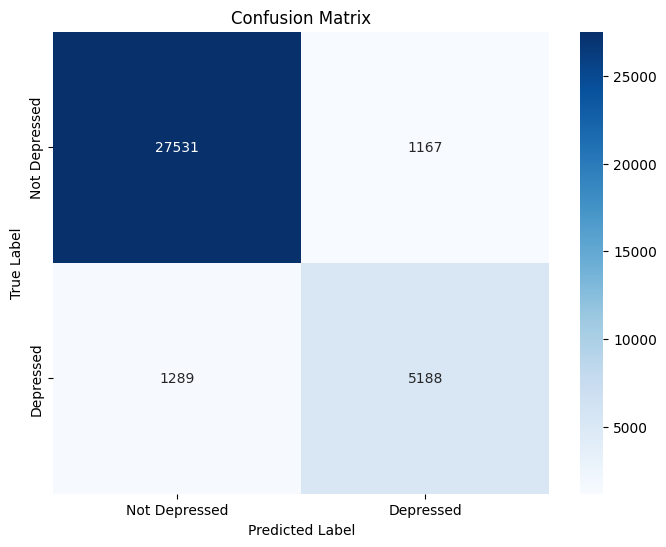

In [130]:
# Calculate confusion matrix
cm = confusion_matrix(model_yhat_binarized, y_test)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', "Depressed"], yticklabels=['Not Depressed', "Depressed"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Fitting the splitted_test set 

In [131]:
# we will now fit the X_test and y_test to the base model 
best_model.fit(X_test, y_test, epochs= 150, verbose = 1)

Epoch 1/150
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9633 - Precision: 0.8320 - Recall: 0.7891 - accuracy: 0.9338 - loss: 0.1824
Epoch 2/150
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9734 - Precision: 0.8382 - Recall: 0.8124 - accuracy: 0.9387 - loss: 0.1549
Epoch 3/150
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9737 - Precision: 0.8427 - Recall: 0.8174 - accuracy: 0.9389 - loss: 0.1553
Epoch 4/150
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9731 - Precision: 0.8382 - Recall: 0.8069 - accuracy: 0.9376 - loss: 0.1539
Epoch 5/150
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9754 - Precision: 0.8434 - Recall: 0.8232 - accuracy: 0.9404 - loss: 0.1505
Epoch 6/150
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9775 - Precision: 0.8381 - Recall: 0.8310 - accuracy: 0.9408 - loss: 0.1443
Epoch 7/150
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9771 - Precision: 0.8491 - Recall: 0.8314 - accuracy: 0.9420 - loss: 0.1451
Epoch 8/150
1100/110

# Predicting the test set

In [132]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93800 entries, 140700 to 234499
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 93800 non-null  int64  
 1   Age                                    93800 non-null  float64
 2   City                                   93800 non-null  int64  
 3   Working Professional or Student        93800 non-null  int64  
 4   Profession                             93800 non-null  int64  
 5   Academic Pressure                      93800 non-null  float64
 6   Work Pressure                          93800 non-null  float64
 7   CGPA                                   93800 non-null  float64
 8   Study Satisfaction                     93800 non-null  float64
 9   Job Satisfaction                       93800 non-null  float64
 10  Sleep Duration                         93800 non-null  int64  
 11  D

In [133]:
test_df.head(5)

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,
140700,1,53.0,30,1,17,0.0,2.0,0.00,0.0,5.0,2,1,12,0,9.0,3.0,1
140701,0,58.0,13,1,11,0.0,2.0,0.00,0.0,4.0,2,1,2,0,6.0,4.0,0
140702,1,53.0,10,1,29,0.0,4.0,0.00,0.0,1.0,1,1,0,1,12.0,4.0,0
140703,0,23.0,23,0,28,5.0,0.0,6.84,1.0,0.0,3,1,10,1,10.0,4.0,0
140704,1,47.0,11,1,29,0.0,5.0,0.00,0.0,5.0,1,1,7,1,3.0,4.0,0


In [134]:
scaler = MinMaxScaler()
test_scaler_df = pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns)  

In [135]:
test_scaler_df

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1.0,0.833333,1.000000,1.0,0.53125,0.0,0.4,0.000,0.0,1.0,0.50,0.333333,0.444444,0.0,0.750000,0.50,1.0
1,0.0,0.952381,0.433333,1.0,0.34375,0.0,0.4,0.000,0.0,0.8,0.50,0.333333,0.074074,0.0,0.500000,0.75,0.0
2,1.0,0.833333,0.333333,1.0,0.90625,0.0,0.8,0.000,0.0,0.2,0.25,0.333333,0.000000,1.0,1.000000,0.75,0.0
3,0.0,0.119048,0.766667,0.0,0.87500,1.0,0.0,0.684,0.2,0.0,0.75,0.333333,0.370370,1.0,0.833333,0.75,0.0
4,1.0,0.690476,0.366667,1.0,0.90625,0.0,1.0,0.000,0.0,1.0,0.25,0.333333,0.259259,1.0,0.250000,0.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,0.0,0.738095,0.333333,1.0,0.71875,0.0,0.6,0.000,0.0,1.0,0.50,0.333333,0.370370,1.0,0.166667,0.25,1.0
93796,1.0,0.261905,0.033333,1.0,0.71875,0.0,1.0,0.000,0.0,0.2,0.25,0.333333,0.296296,1.0,0.916667,0.50,1.0
93797,1.0,0.142857,1.000000,0.0,0.87500,0.2,0.0,0.751,0.8,0.0,0.25,0.333333,0.148148,0.0,0.583333,0.00,0.0
93798,0.0,0.119048,0.366667,1.0,0.62500,0.0,0.8,0.000,0.0,0.4,0.00,0.000000,0.185185,1.0,0.583333,1.00,1.0


In [136]:
test_set_prediction = best_model.predict(test_scaler_df)

2932/2932 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [137]:
test_set_prediction

array([[7.4767259e-15],
       [2.0922499e-36],
       [2.3599789e-10],
       ...,
       [1.7893170e-28],
       [9.9668545e-01],
       [1.3519600e-38]], dtype=float32)

In [138]:
model_test_set_binarized = np.where(test_set_prediction >= 0.5, 1, 0)

In [139]:
print(type(model_test_set_binarized))
print(model_test_set_binarized)
print(model_test_set_binarized.ndim)
print(len(model_test_set_binarized))

<class 'numpy.ndarray'>
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]
2
93800


In [140]:
test_df.index

Index([140700, 140701, 140702, 140703, 140704, 140705, 140706, 140707, 140708,
       140709,
       ...
       234490, 234491, 234492, 234493, 234494, 234495, 234496, 234497, 234498,
       234499],
      dtype='int64', name='id', length=93800)

In [141]:
test_df_dict = {"id":test_df.index,
               "Depressed":model_test_set_binarized.ravel()}
test_df_dict

{'id': Index([140700, 140701, 140702, 140703, 140704, 140705, 140706, 140707, 140708,
        140709,
        ...
        234490, 234491, 234492, 234493, 234494, 234495, 234496, 234497, 234498,
        234499],
       dtype='int64', name='id', length=93800),
 'Depressed': array([0, 0, 0, ..., 0, 1, 0])}

In [142]:
test_df_result = pd.DataFrame(test_df_dict ).set_index('id')
test_df_result

,Depressed
id,
140700,0
140701,0
140702,0
140703,1
140704,1
...,...
234495,0
234496,1
234497,0


In [143]:
test_df_result.to_csv('submission.csv')